<a href="https://colab.research.google.com/github/thebabycode/Computer-Vision/blob/main/CV_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

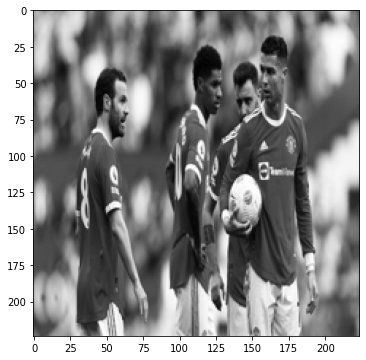

In [ ]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');
img = Image.open('/content/sample_data/test.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

In [ ]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

Sharpening the Image

In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
calculate_target_size(img_size=224, kernel_size=3)

222

In [ ]:
calculate_target_size(img_size=224, kernel_size=5)

220

In [ ]:
subset = np.array(img)[0:0+3, 0:0+3]
subset

array([[155, 169, 174],
       [160, 173, 178],
       [163, 175, 179]], dtype=uint8)

In [ ]:
np.multiply(subset, sharpen)

array([[   0, -169,    0],
       [-160,  865, -178],
       [   0, -175,    0]])

In [ ]:
np.sum(np.multiply(subset, sharpen))

183

In [ ]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

In [ ]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)

In [ ]:
img_sharpened

array([[183., 188., 183., ..., 124.,  93.,  78.],
       [186., 184., 187., ..., 126., 113.,  76.],
       [179., 186., 180., ..., 133., 118.,  88.],
       ...,
       [ 98.,  91.,  80., ...,  60.,  91., 128.],
       [102., 100.,  86., ...,  70.,  95., 122.],
       [113., 116.,  98., ...,  72.,  95., 122.]])

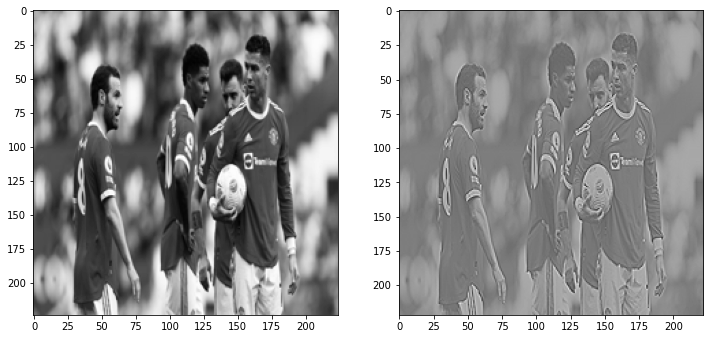

In [ ]:
plot_two_images(
    img1=img, 
    img2=img_sharpened
)

In [ ]:
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

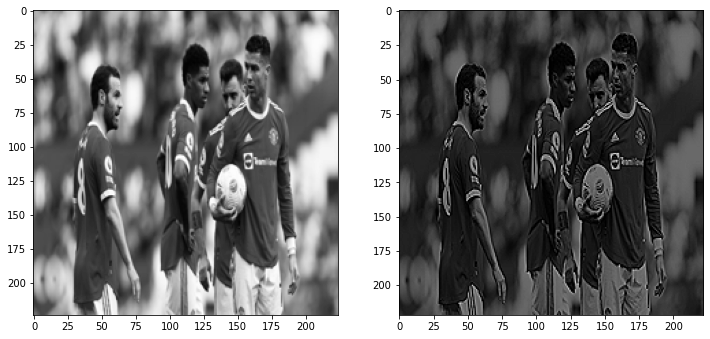

In [ ]:
plot_two_images(
    img1=img, 
    img2=negative_to_zero(img=img_sharpened)
)

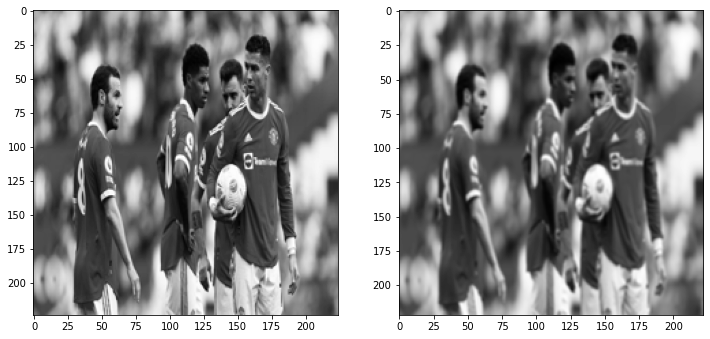

In [ ]:
img_blurred = convolve(img=np.array(img), kernel=blur)
plot_two_images(
    img1=img, 
    img2=img_blurred
)

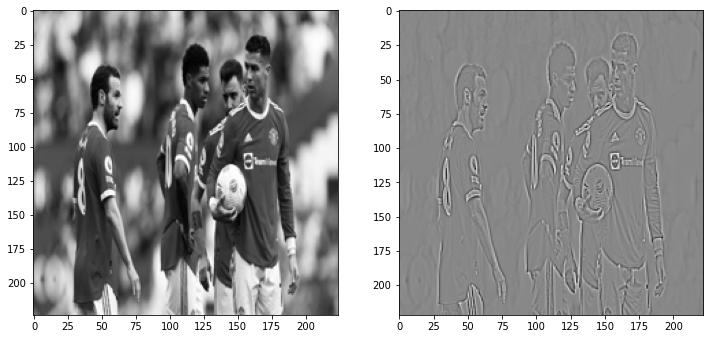

In [ ]:
img_outlined = convolve(img=np.array(img), kernel=outline)
plot_two_images(
    img1=img, 
    img2=img_outlined
)

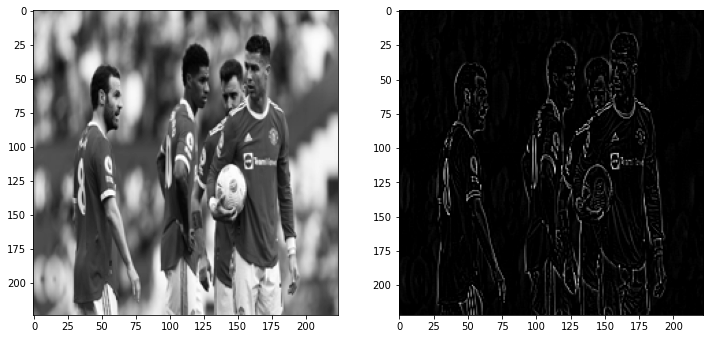

In [ ]:
plot_two_images(
    img1=img, 
    img2=negative_to_zero(img=img_outlined)
)

1. Spatial domain is the representation of an image as a function of position.
A domain is a set of values that a function can take. The spatial domain of an image is the set of all points in space that the image can occupy. The image is a function of position, so the spatial domain is the set of all positions in space.

2. Frequency domain is the representation of an image as a function of frequency.
A domain is a set of values that a function can take. The frequency domain is the set of frequencies that an image can be represented as. An image in the frequency domain is a function of frequency. The frequency domain is the representation of an image as a function of frequency.

3. Spatial domain and frequency domain are two ways of representing an image.
An image can be represented in either the spatial domain or the frequency domain. In the spatial domain, an image is represented as a grid of pixels, with each pixel representing a specific color or intensity. In the frequency domain, an image is represented as a set of sinusoidal waves, with each wave representing a specific color or intensity.

6.3.1 Spatial domain convolution
The pixels in an input image represent different “spatial” positions, therefore when convolution is done only using the actual input pixel values, we name the process as being done in the “Spatial domain”. In particular this is in contrast to the “frequency domain” that we will discuss later in Frequency domain and Fourier operations. In the spatial domain (and in realistic situations where the image and the convolution kernel don’t extend to infinity), convolution is the process of changing the value of one pixel to the weighted average of all the pixels in its neighborhood.

Correlation


In [ ]:
import cv2

In [ ]:
# read image
src = cv2.imread('/content/sample_data/plants.jpg', 0)
# prepare the filter
kernel = [[0,0,0], [0,1,0], [0,0,0]]
# apply kernel to the original image
dst = cv2.filter2D(src, -1, np.array(kernel))
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('result.png', result)

True

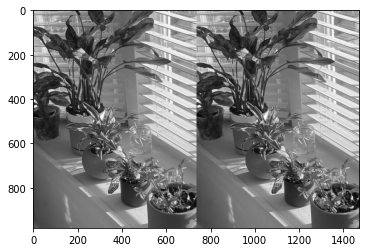

In [ ]:
image = cv2.imread('result.png')
plt.imshow(image)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
# read image
src = cv2.imread('/content/sample_data/plants.jpg',0)
# prepare the filter
kernel = np.array([[1,1,1],[1,1,0],[1,0,0]])
# apply kernel to the original image using convolution filtering
dst_conv  = ndimage.convolve(src, kernel, mode='constant', cval=1.0)
# apply kernel to the original image using correlation filtering
dst_corr = cv2.filter2D(src, -1, kernel)
# concatenate images horizontally
result = np.concatenate((src, dst_corr, dst_conv), axis=1)
cv2.imwrite('result2.png', result)

True

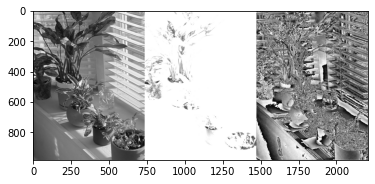

In [ ]:
image = cv2.imread('result2.png')
plt.imshow(image)